In [1]:
# Dependencies
import pandas as pd
from config import league_id, espn_s2, swid
import ESPNFFPlayerData as ff
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Define the league_id
league_id = league_id

# Define cookie parameters
espn_s2 = espn_s2
swid = swid

# Define the year to pull
year = 2022

In [3]:
# Initialize empty DataFrame to concat with each week
df = pd.DataFrame()

# Loop through each week and concat the results
for week in range(1, 7):
    league = ff.load_league(league_id, year, week, swid, espn_s2)
    temp_df = ff.load_player_data(league, week)
    df = df.append(temp_df).reset_index(drop=True)

In [5]:
df

,Week,PlayerName,PlayerScoreActual,PlayerScoreProjected,PlayerFantasyTeam,PlayerRosterSlot
0,1,Najee Harris,10.6,16.466495,1,RB
1,1,Dalvin Cook,13.8,16.794135,1,RB
2,1,A.J. Brown,25.5,14.401352,1,WR
3,1,Diontae Johnson,12.5,14.686890,1,WR
4,1,DK Metcalf,8.6,13.102843,1,FLEX
...,...,...,...,...,...,...
963,6,Cowboys D/ST,10.8,7.470293,14,Bench
964,6,Derek Carr,10.8,0.000000,14,Bench
965,6,David Njoku,8.8,9.918012,14,TE
966,6,Jason Sanders,4.0,7.155431,14,K


In [61]:
# Load the team names
week = 7

df = ff.load_team_names(df, league_id, year, week, swid, espn_s2)

In [19]:
df

,Week,PlayerName,PlayerScoreActual,PlayerScoreProjected,PlayerFantasyTeam,PlayerRosterSlot,TeamName,FullName
0,1,Najee Harris,10.6,16.466495,1,RB,Team E,Player D
1,1,Dalvin Cook,13.8,16.794135,1,RB,Team E,Player D
2,1,A.J. Brown,25.5,14.401352,1,WR,Team E,Player D
3,1,Diontae Johnson,12.5,14.686890,1,WR,Team E,Player D
4,1,DK Metcalf,8.6,13.102843,1,FLEX,Team E,Player D
...,...,...,...,...,...,...,...,...
963,6,Cowboys D/ST,10.8,7.470293,14,Bench,Team D,Player E
964,6,Derek Carr,10.8,0.000000,14,Bench,Team D,Player E
965,6,David Njoku,8.8,9.918012,14,TE,Team D,Player E
966,6,Jason Sanders,4.0,7.155431,14,K,Team D,Player E


In [72]:
df.to_csv('data.csv')

In [62]:
df = df[df['Week'] == 6]

/Users/timothybryan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


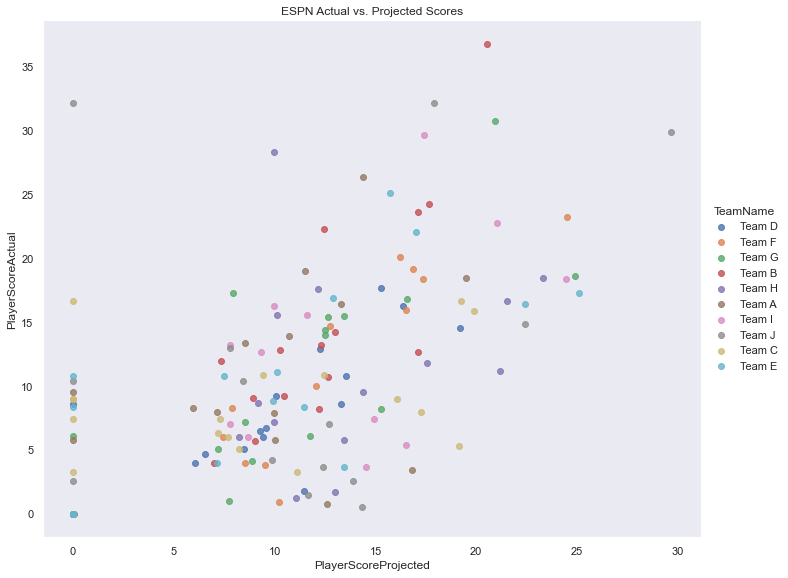

In [71]:
# Plot PlayerScoreProjected vs. PlayerScoreActual and color based on TeamName
plt.rcParams['figure.figsize'] = 11.7, 8.27

import numpy as np


color_map = {
    'Team A': 'red',
    'Team B': 'blue',
    'Team C': 'green',
    'Team D': 'yellow',
    'Team E': 'pink',
    'Team F': 'brown',
    'Team G': 'purple',
    'Team H': 'black',
    'Team I': 'orange',
    'Team J': 'grey',
}

ax = sns.lmplot('PlayerScoreProjected', 'PlayerScoreActual',
           data=df, hue='TeamName', height=8, aspect=1.25, fit_reg=False).set(title='ESPN Actual vs. Projected Scores')


